
# 🧪 SQL Server – Exploration des bases AdventureWorks (Docker)

Ce notebook permet de **se connecter** à ton SQL Server Docker (`sql-bootcamp-server`), 
**lister les bases**, **explorer les schémas et tables**, prévisualiser des données, et faire quelques **visualisations** simples.

> Prérequis côté machine :
> - **ODBC Driver 18 for SQL Server** installé
> - Paquets Python : `pyodbc`, `pandas`, `sqlalchemy` (optionnel), `matplotlib`
> - Ton conteneur `sql-bootcamp-server` actif avec SQL Server 2022


## 🔧 Installation des dépendances (si nécessaire)

In [ ]:

# Décommente si besoin d'installer depuis le notebook
# %pip install pyodbc pandas SQLAlchemy matplotlib


## ⚙️ Configuration de la connexion

In [1]:

import os

# Paramètres de connexion par défaut (Docker local)
SQL_SERVER = os.getenv("SQL_SERVER", "localhost")
SQL_PORT   = int(os.getenv("SQL_PORT", "1433"))
SQL_USER   = os.getenv("SQL_USER", "SA")
SQL_PASS   = os.getenv("SQL_PASS", "YourStrong@Passw0rd")

# Base par défaut (laissée vide pour interroger sys.databases)
DEFAULT_DB = os.getenv("SQL_DATABASE", "")

print(f"➡️ Cible: {SQL_SERVER}:{SQL_PORT} (user={SQL_USER}, db={DEFAULT_DB or 'N/A'})")


➡️ Cible: localhost:1433 (user=SA, db=N/A)


In [4]:
import pyodbc

# 🔎 Lister les drivers ODBC installés
available_drivers = [d for d in pyodbc.drivers()]
print("✅ Drivers ODBC disponibles :", available_drivers)

# Choisir automatiquement le meilleur driver SQL Server
driver_priority = ["ODBC Driver 18 for SQL Server", "ODBC Driver 17 for SQL Server", "SQL Server"]

chosen_driver = None
for d in driver_priority:
    if d in available_drivers:
        chosen_driver = d
        break

if not chosen_driver:
    raise RuntimeError("❌ Aucun driver ODBC SQL Server trouvé. Installez ODBC Driver 17 ou 18.")

print(f"➡️ Driver choisi : {chosen_driver}")

def make_conn(database: str = ""):
    """
    Connexion pyodbc automatique à SQL Server (choix du driver en fonction de ce qui est installé).
    """
    conn_str = (
        f"DRIVER={{{chosen_driver}}};"
        f"SERVER={SQL_SERVER},{SQL_PORT};"
        f"UID={SQL_USER};"
        f"PWD={SQL_PASS};"
        f"DATABASE={database};"
        "Encrypt=no;"
        "TrustServerCertificate=yes;"
        "Connection Timeout=30;"
    )
    return pyodbc.connect(conn_str)


✅ Drivers ODBC disponibles : ['SQL Server', 'ODBC Driver 17 for SQL Server', 'PostgreSQL ODBC Driver(ANSI)', 'PostgreSQL ODBC Driver(UNICODE)', 'Client Access ODBC Driver (32-bit)', 'iSeries Access ODBC Driver', 'IBM i Access ODBC Driver']
➡️ Driver choisi : ODBC Driver 17 for SQL Server


## 🔌 Connexion pyodbc

In [5]:

import pyodbc
import pandas as pd

def make_conn(database: str = ""):
    """
    Ouvre une connexion pyodbc à SQL Server.
    Utilise le Driver ODBC 17 (Windows/Mac/Linux) et accepte le certificat auto-signé du conteneur.
    """
    driver = "ODBC Driver 17 for SQL Server"
    conn_str = (
        f"DRIVER={{{driver}}};"
        f"SERVER={SQL_SERVER},{SQL_PORT};"
        f"UID={SQL_USER};"
        f"PWD={SQL_PASS};"
        f"DATABASE={database};"
        "Encrypt=no;"
        "TrustServerCertificate=yes;"
        "Connection Timeout=30;"
    )
    return pyodbc.connect(conn_str)

# Test de connexion (au serveur, sans base spécifique)
with make_conn("") as conn:
    df = pd.read_sql("SELECT name, database_id, create_date FROM sys.databases ORDER BY name;", conn)
df


C:\Users\awounfouet\AppData\Local\Temp\ipykernel_28504\2692629368.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT name, database_id, create_date FROM sys.databases ORDER BY name;", conn)


,name,database_id,create_date
0,AdventureWorks2022,6,2025-09-11 13:10:05.340
1,AdventureWorksDW2022,7,2025-09-11 13:13:57.240
2,AdventureWorksLT2022,8,2025-09-11 13:15:18.470
3,master,1,2003-04-08 09:13:36.390
4,model,3,2003-04-08 09:13:36.390
5,msdb,4,2025-06-13 14:13:04.273
6,SQLBootcamp,5,2025-07-30 15:31:34.767
7,tempdb,2,2025-09-11 12:51:25.400


In [8]:
from sqlalchemy import create_engine
import pandas as pd

SQL_SERVER = "localhost"
SQL_PORT = 1433
SQL_USER = "SA"
SQL_PASS = "YourStrong@Passw0rd"

connection_url = (
    f"mssql+pyodbc://{SQL_USER}:{SQL_PASS}@{SQL_SERVER},{SQL_PORT}/master"
    "?driver=ODBC+Driver+17+for+SQL+Server"
    "&TrustServerCertificate=yes"
    "&Encrypt=no"
)

engine = create_engine(connection_url)

#df = pd.read_sql("SELECT name, database_id, create_date FROM sys.databases ORDER BY name;", engine)
#df

In [9]:
import pyodbc

conn = pyodbc.connect(
    "DRIVER={ODBC Driver 17 for SQL Server};"
    "SERVER=localhost,1433;"
    "UID=SA;"
    "PWD=YourStrong@Passw0rd;"
    "DATABASE=master;"
    "Encrypt=no;"
    "TrustServerCertificate=yes;"
)
print("✅ Connexion réussie avec pyodbc")


✅ Connexion réussie avec pyodbc


In [10]:
from sqlalchemy import create_engine
import pandas as pd
import urllib

SQL_SERVER = "localhost"
SQL_PORT = 1433
SQL_USER = "SA"
SQL_PASS = "YourStrong@Passw0rd"
DATABASE = "master"

# Construire la chaîne de connexion avec urllib.parse.quote_plus
params = urllib.parse.quote_plus(
    f"DRIVER=ODBC Driver 17 for SQL Server;"
    f"SERVER={SQL_SERVER},{SQL_PORT};"
    f"DATABASE={DATABASE};"
    f"UID={SQL_USER};"
    f"PWD={SQL_PASS};"
    f"Encrypt=no;"
    f"TrustServerCertificate=yes;"
)

engine = create_engine(f"mssql+pyodbc:///?odbc_connect={params}")

df = pd.read_sql("SELECT name, database_id, create_date FROM sys.databases ORDER BY name;", engine)
df


,name,database_id,create_date
0,AdventureWorks2022,6,2025-09-11 13:10:05.340
1,AdventureWorksDW2022,7,2025-09-11 13:13:57.240
2,AdventureWorksLT2022,8,2025-09-11 13:15:18.470
3,master,1,2003-04-08 09:13:36.390
4,model,3,2003-04-08 09:13:36.390
5,msdb,4,2025-06-13 14:13:04.273
6,SQLBootcamp,5,2025-07-30 15:31:34.767
7,tempdb,2,2025-09-11 12:51:25.400


## 🎛️ Sélection de la base à explorer

In [11]:

# Choisis ici la base à explorer (ex: AdventureWorks2022 / AdventureWorksDW2022 / AdventureWorksLT2022)
DB_NAME = "AdventureWorks2022"  # ← modifie moi si besoin
print("Base sélectionnée:", DB_NAME)


Base sélectionnée: AdventureWorks2022


## 📚 Schémas & Tables

In [13]:
import warnings
warnings.filterwarnings("ignore", message="pandas only supports SQLAlchemy", category=UserWarning)

In [16]:

with make_conn(DB_NAME) as conn:
    schemas = pd.read_sql(
        "SELECT DISTINCT schema_name = s.name FROM sys.schemas s ORDER BY s.name;", conn
    )
    tables = pd.read_sql(
        "SELECT TABLE_SCHEMA, TABLE_NAME FROM INFORMATION_SCHEMA.TABLES "
        "WHERE TABLE_TYPE = 'BASE TABLE' ORDER BY TABLE_SCHEMA, TABLE_NAME;",
        conn,
    )

display(schemas), display(tables.head(20))


,schema_name
0,db_accessadmin
1,db_backupoperator
2,db_datareader
3,db_datawriter
4,db_ddladmin
5,db_denydatareader
6,db_denydatawriter
7,db_owner
8,db_securityadmin
9,dbo


,TABLE_SCHEMA,TABLE_NAME
0,dbo,AWBuildVersion
1,dbo,DatabaseLog
2,dbo,ErrorLog
3,HumanResources,Department
4,HumanResources,Employee
5,HumanResources,EmployeeDepartmentHistory
6,HumanResources,EmployeePayHistory
7,HumanResources,JobCandidate
8,HumanResources,Shift
9,Person,Address


(None, None)

In [29]:
tables

,TABLE_SCHEMA,TABLE_NAME
0,dbo,AWBuildVersion
1,dbo,DatabaseLog
2,dbo,ErrorLog
3,HumanResources,Department
4,HumanResources,Employee
...,...,...
66,Sales,SalesTerritoryHistory
67,Sales,ShoppingCartItem
68,Sales,SpecialOffer
69,Sales,SpecialOfferProduct


## 👀 Prévisualiser une table

In [18]:

def head_table(schema: str, table: str, n: int = 5):
    query = f"SELECT TOP {n} * FROM [{schema}].[{table}]"
    with make_conn(DB_NAME) as conn:
        return pd.read_sql(query, conn)

# Exemple: prévisualiser les 5 premières lignes d'une table connue
head_table("Person", "Person", 5)


,BusinessEntityID,PersonType,NameStyle,Title,FirstName,MiddleName,LastName,Suffix,EmailPromotion,AdditionalContactInfo,Demographics,rowguid,ModifiedDate
0,1,EM,False,None,Ken,J,Sánchez,None,0,None,"<IndividualSurvey xmlns=""http://schemas.micros...",92C4279F-1207-48A3-8448-4636514EB7E2,2009-01-07
1,2,EM,False,None,Terri,Lee,Duffy,None,1,None,"<IndividualSurvey xmlns=""http://schemas.micros...",D8763459-8AA8-47CC-AFF7-C9079AF79033,2008-01-24
2,3,EM,False,None,Roberto,None,Tamburello,None,0,None,"<IndividualSurvey xmlns=""http://schemas.micros...",E1A2555E-0828-434B-A33B-6F38136A37DE,2007-11-04
3,4,EM,False,None,Rob,None,Walters,None,0,None,"<IndividualSurvey xmlns=""http://schemas.micros...",F2D7CE06-38B3-4357-805B-F4B6B71C01FF,2007-11-28
4,5,EM,False,Ms.,Gail,A,Erickson,None,0,None,"<IndividualSurvey xmlns=""http://schemas.micros...",F3A3F6B4-AE3B-430C-A754-9F2231BA6FEF,2007-12-30


## 🔢 Nombre de lignes par table (aperçu rapide)

In [19]:

# ATTENTION : ceci peut être long sur de très grosses tables.
# Pour AdventureWorks, c'est raisonnable.
row_counts = []
with make_conn(DB_NAME) as conn:
    for _, r in tables.iterrows():
        schema, table = r["TABLE_SCHEMA"], r["TABLE_NAME"]
        q = f"SELECT COUNT(*) AS cnt FROM [{schema}].[{table}]"
        try:
            cnt = pd.read_sql(q, conn).iloc[0,0]
        except Exception as e:
            cnt = None
        row_counts.append((schema, table, cnt))

df_counts = pd.DataFrame(row_counts, columns=["schema", "table", "rows"]).sort_values(
    ["rows", "schema", "table"], ascending=[False, True, True]
)
df_counts.head(20)


,schema,table,rows
58,Sales,SalesOrderDetail,121317
42,Production,TransactionHistory,113443
43,Production,TransactionHistoryArchive,89253
45,Production,WorkOrder,72591
46,Production,WorkOrderRouting,67131
59,Sales,SalesOrderHeader,31465
60,Sales,SalesOrderHeaderSalesReason,27647
11,Person,BusinessEntity,20777
16,Person,EmailAddress,19972
17,Person,Password,19972


In [22]:
df_counts[df_counts["schema"] == "Sales"]

,schema,table,rows
58,Sales,SalesOrderDetail,121317
59,Sales,SalesOrderHeader,31465
60,Sales,SalesOrderHeaderSalesReason,27647
56,Sales,Customer,19820
53,Sales,CreditCard,19118
57,Sales,PersonCreditCard,19118
55,Sales,CurrencyRate,13532
70,Sales,Store,701
69,Sales,SpecialOfferProduct,538
62,Sales,SalesPersonQuotaHistory,163


## 📈 Exemple : Top 10 des produits par quantité vendue (AdventureWorks2022)

,ProductName,TotalQty
0,AWC Logo Cap,8311
1,Water Bottle - 30 oz.,6815
2,"Sport-100 Helmet, Blue",6743
3,"Long-Sleeve Logo Jersey, L",6592
4,"Sport-100 Helmet, Black",6532
5,"Sport-100 Helmet, Red",6266
6,"Classic Vest, S",4247
7,Patch Kit/8 Patches,3865
8,"Short-Sleeve Classic Jersey, XL",3864
9,"Long-Sleeve Logo Jersey, M",3636


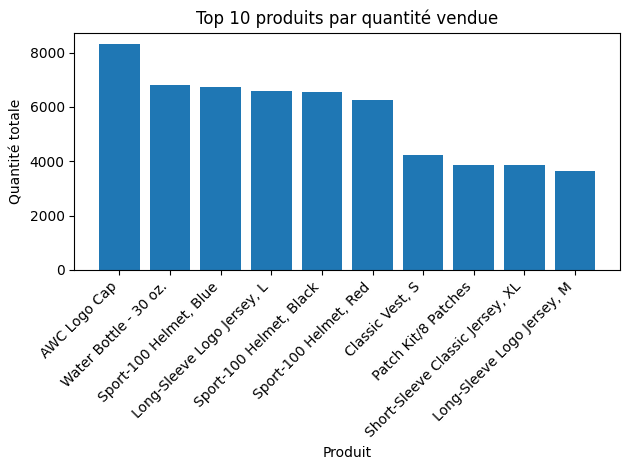

In [25]:

import matplotlib.pyplot as plt

if DB_NAME == "AdventureWorks2022":
    query = (
        "SELECT TOP 10 p.Name AS ProductName, SUM(sod.OrderQty) AS TotalQty "
        "FROM Sales.SalesOrderDetail sod "
        "JOIN Production.Product p ON sod.ProductID = p.ProductID "
        "GROUP BY p.Name "
        "ORDER BY TotalQty DESC;"
    )
    with make_conn(DB_NAME) as conn:
        top_products = pd.read_sql(query, conn)

    display(top_products)

    # Chart: Matplotlib only, single plot, no custom colors
    plt.figure()
    plt.bar(top_products["ProductName"], top_products["TotalQty"])
    plt.xticks(rotation=45, ha="right")
    plt.title("Top 10 produits par quantité vendue")
    plt.xlabel("Produit")
    plt.ylabel("Quantité totale")
    plt.tight_layout()
    plt.show()
else:
    print("Change DB_NAME à 'AdventureWorks2022' pour exécuter cet exemple.")


## 🧭 Exemples alternatifs pour DW & LT

In [26]:

if DB_NAME == "AdventureWorksDW2022":
    q = (
        "SELECT TOP 10 d.CalendarYear, SUM(f.SalesAmount) AS TotalSales "
        "FROM dbo.FactInternetSales f "
        "JOIN dbo.DimDate d ON f.OrderDateKey = d.DateKey "
        "GROUP BY d.CalendarYear "
        "ORDER BY TotalSales DESC;"
    )
    with make_conn(DB_NAME) as conn:
        df_dw = pd.read_sql(q, conn)
    display(df_dw)

    import matplotlib.pyplot as plt
    plt.figure()
    plt.plot(df_dw["CalendarYear"], df_dw["TotalSales"], marker="o")
    plt.title("Ventes Internet par année (Top)")
    plt.xlabel("Année")
    plt.ylabel("Ventes")
    plt.tight_layout()
    plt.show()

elif DB_NAME == "AdventureWorksLT2022":
    q = (
        "SELECT TOP 10 c.FirstName + ' ' + c.LastName AS FullName, COUNT(*) AS Orders "
        "FROM SalesLT.Customer c "
        "JOIN SalesLT.SalesOrderHeader h ON c.CustomerID = h.CustomerID "
        "GROUP BY c.FirstName, c.LastName "
        "ORDER BY Orders DESC;"
    )
    with make_conn(DB_NAME) as conn:
        df_lt = pd.read_sql(q, conn)
    display(df_lt)

    import matplotlib.pyplot as plt
    plt.figure()
    plt.bar(df_lt["FullName"], df_lt["Orders"])
    plt.xticks(rotation=45, ha="right")
    plt.title("Top 10 clients par nombre de commandes")
    plt.xlabel("Client")
    plt.ylabel("Nb commandes")
    plt.tight_layout()
    plt.show()
else:
    print("Change DB_NAME à 'AdventureWorksDW2022' ou 'AdventureWorksLT2022' pour ces exemples.")


Change DB_NAME à 'AdventureWorksDW2022' ou 'AdventureWorksLT2022' pour ces exemples.


## 🧰 Boîte à outils : exécuter une requête SQL libre

In [28]:

def run_sql(query: str, database: str = None) -> pd.DataFrame:
    database = database or DB_NAME
    with make_conn(database) as conn:
        return pd.read_sql(query, conn)

# Exemple :
run_sql("SELECT TOP 5 * FROM Person.Person")


,BusinessEntityID,PersonType,NameStyle,Title,FirstName,MiddleName,LastName,Suffix,EmailPromotion,AdditionalContactInfo,Demographics,rowguid,ModifiedDate
0,1,EM,False,None,Ken,J,Sánchez,None,0,None,"<IndividualSurvey xmlns=""http://schemas.micros...",92C4279F-1207-48A3-8448-4636514EB7E2,2009-01-07
1,2,EM,False,None,Terri,Lee,Duffy,None,1,None,"<IndividualSurvey xmlns=""http://schemas.micros...",D8763459-8AA8-47CC-AFF7-C9079AF79033,2008-01-24
2,3,EM,False,None,Roberto,None,Tamburello,None,0,None,"<IndividualSurvey xmlns=""http://schemas.micros...",E1A2555E-0828-434B-A33B-6F38136A37DE,2007-11-04
3,4,EM,False,None,Rob,None,Walters,None,0,None,"<IndividualSurvey xmlns=""http://schemas.micros...",F2D7CE06-38B3-4357-805B-F4B6B71C01FF,2007-11-28
4,5,EM,False,Ms.,Gail,A,Erickson,None,0,None,"<IndividualSurvey xmlns=""http://schemas.micros...",F3A3F6B4-AE3B-430C-A754-9F2231BA6FEF,2007-12-30
